In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ignore TensorFlow info messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [3]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8890 - loss: 0.3975 - val_accuracy: 0.9814 - val_loss: 0.0635
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9815 - loss: 0.0586 - val_accuracy: 0.9872 - val_loss: 0.0468
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9874 - loss: 0.0382 - val_accuracy: 0.9871 - val_loss: 0.0462
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9901 - val_loss: 0.0358
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9943 - loss: 0.0166 - val_accuracy: 0.9874 - val_loss: 0.0455


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9858 - loss: 0.0455
Test Accuracy: 0.9885


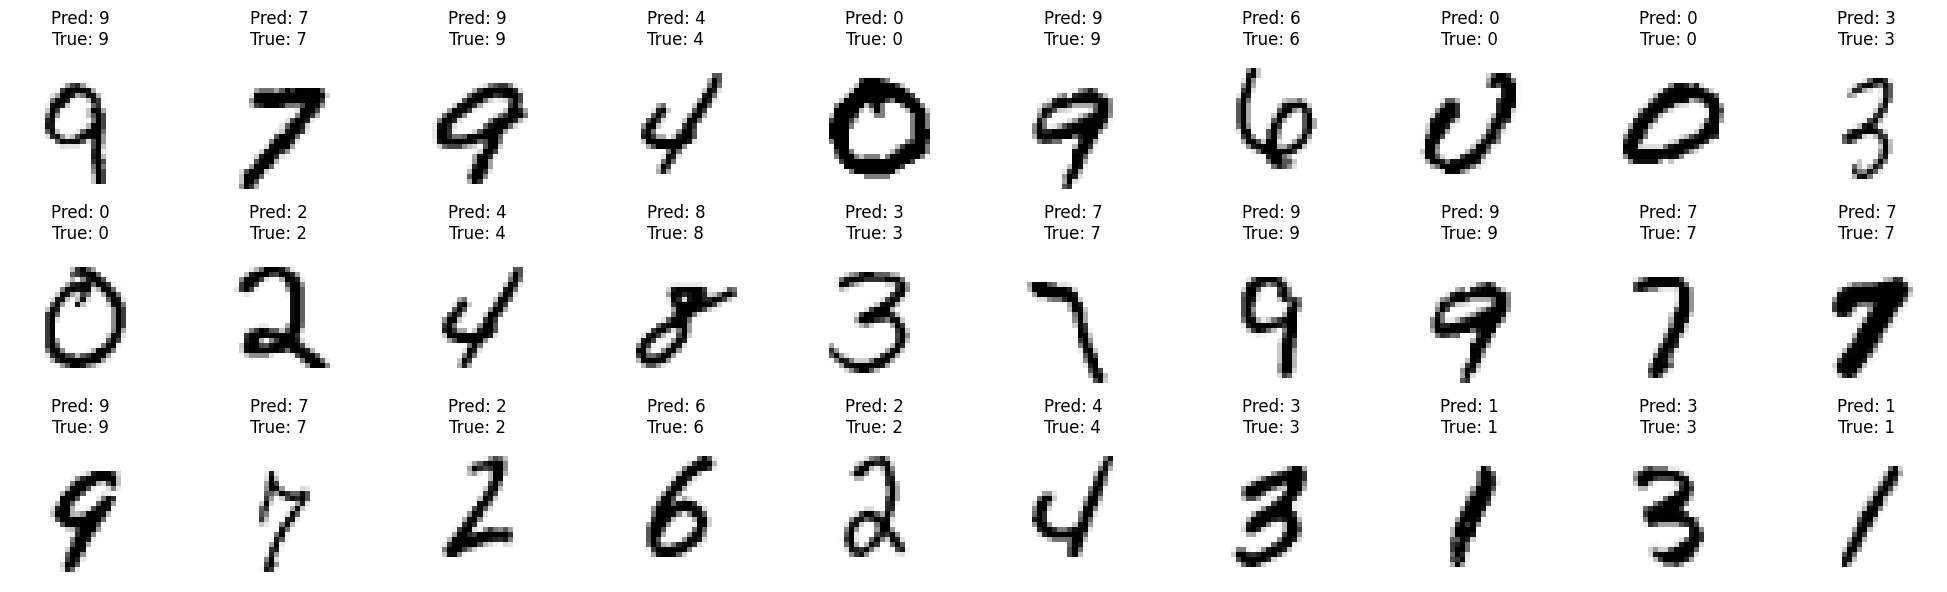

In [7]:
rows, cols = 3, 10
plt.figure(figsize=(20,6))
for i in range(rows*cols):
    idx = random.randint(0, x_test.shape[0]-1)
    img = x_test[idx].reshape(28,28)
    pred = np.argmax(model.predict(x_test[idx:idx+1], verbose=0))
    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap='gray_r')
    plt.title(f"Pred: {pred}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
def test_single(idx):
    img = x_test[idx]
    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(f"True label: {y_test[idx]}", color='g')

    preds = model.predict(img.reshape(1,28,28,1), verbose=0)
    pred_class = np.argmax(preds)
    confidence = float(np.max(preds))
    color = 'b' if pred_class == y_test[idx] else 'r'
    plt.xlabel(f"Prediction = {pred_class} (Confidence = {confidence:.2f})", color=color)
    plt.show()

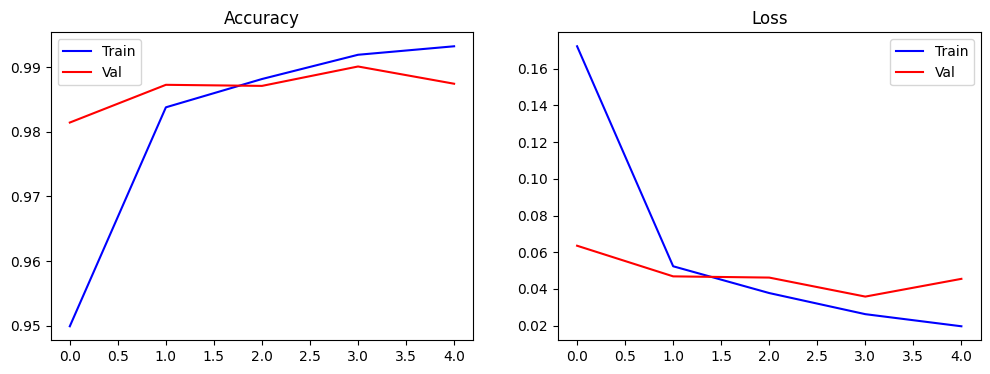

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],'b-',label='Train')
plt.plot(history.history['val_accuracy'],'r-',label='Val')
plt.title("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],'b-',label='Train')
plt.plot(history.history['val_loss'],'r-',label='Val')
plt.title("Loss"); plt.legend()
plt.show()

Test Accuracy: 0.9885, Loss: 0.0373
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


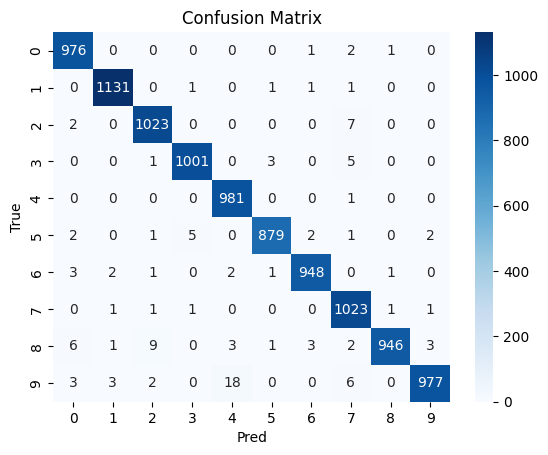

In [12]:
model.save('mnist_model.keras')
best_model = keras.models.load_model('mnist_model.keras')
loss, acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Confusion matrix
y_pred = np.argmax(best_model.predict(x_test),axis=1)

y_true = y_test
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Pred"); plt.ylabel("True")
plt.show()

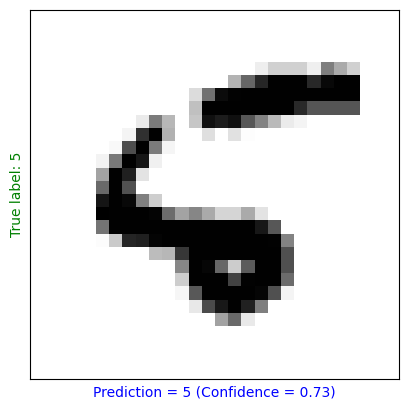

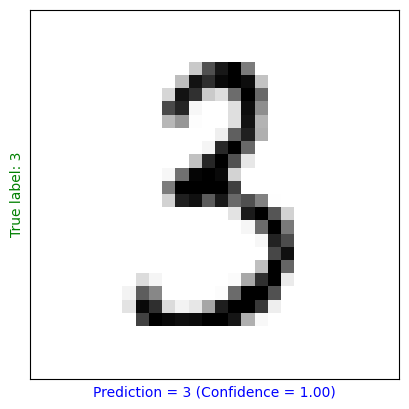

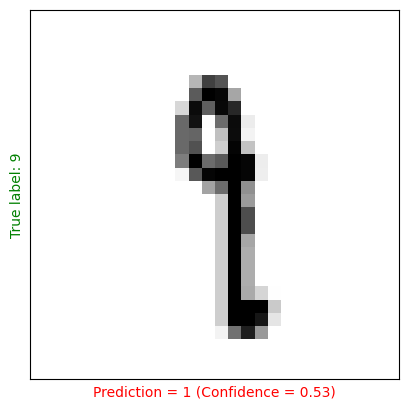

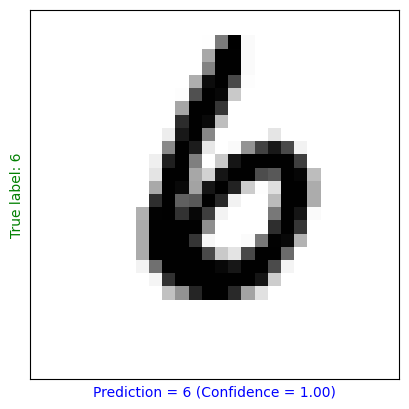

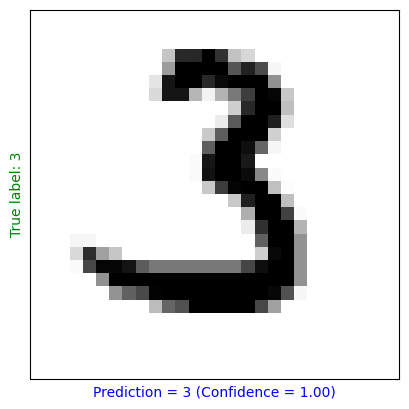

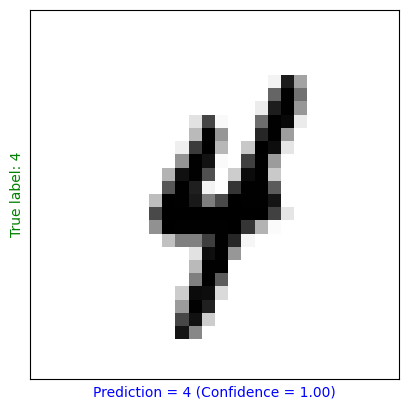

In [13]:
for idx in [8, 76, 4500, 2156, 9156, 6999]:
    test_single(idx)

Model saved as mnist_model.keras
Test Accuracy: 0.9885, Loss: 0.0373
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


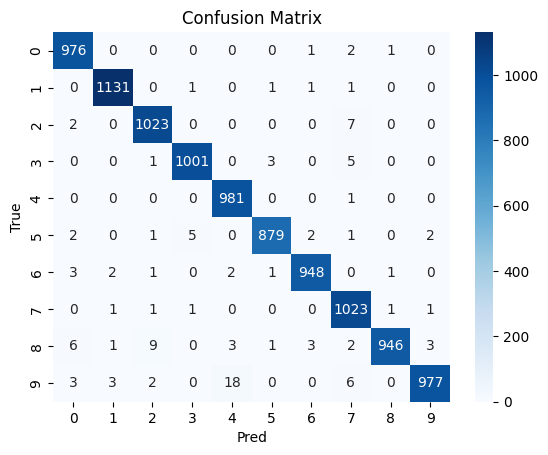

In [14]:
model.save('mnist_model.keras')
print("Model saved as mnist_model.keras")

# Load the saved model and evaluate
best_model = keras.models.load_model('mnist_model.keras')
loss, acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Confusion matrix
y_pred = np.argmax(best_model.predict(x_test),axis=1)

y_true = y_test
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Pred"); plt.ylabel("True")
plt.show()